Supplementary analysis: Window length of 30 seconds
We here replicate the derivation of qualitatively similar three dynamic connectivity states
Please note: As the k-means clustering determines the order of States, it here differs: 
State 1 is State 3 of the main analysis, State 2 is State 1 and State 3 is State 2).
As in the main analysis, we find significantly longer fraction and dwell times in a weakly connected state 
(State 2 of the main analysis, here State 3) in case of moderate symptoms and a trend for longer
dwell tims in the densely connected state (State 1 of the main analysis, here State 2) in case of severe
symptoms. We here also obtain different fraction and dwell times in State 3 of the main analysis, which do not
emerge for 45 or 60 second time windows and might be due to an increased influence of noise at short time
windows. Transition likelihoods do not differ significantly.

In [23]:
# initializing packages
import numpy as np
import pandas as pd
from scipy.io import loadmat
import glob
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import pyreadstat

import scipy.stats as chi2_contingency
import scipy.stats as stats
from scipy.spatial import distance
from matplotlib import cm

# increasing display number of pandas columns and rows
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Supplementary analysis: Window length of 30 seconds
# We here replicate the derivation of qualitatively similar three dynamic connectivity states
# Please note: As the k-means clustering determines the order of States, it here differs: 
# State 1 is State 3 of the main analysis, State 2 is State 1 and State 3 is State 2).
# As in the main analysis, we find significantly longer fraction and dwell times in a weakly connected state 
# (State 2 of the main analysis, here State 3) in case of moderate symptoms and a trend for longer
# dwell tims in the densely connected state (State 1 of the main analysis, here State 2) in case of severe
# symptoms. We here also obtain different fraction and dwell times in State 3 of the main analysis, which do not
# emerge for 45 or 60 second time windows and might be due to an increased influence of noise at short time
# windows. Transition likelihoods do not differ significantly.

In [2]:
# functions to transform vector to dfnc matrix
def calc_num_components(a):
    num_pairs = len(a)
    num_components = int(np.ceil(np.sqrt(2 * num_pairs - 1)))
    if num_components * (num_components - 1) == 2 * num_pairs:
        return num_components
    else:
        return 0


def return_dfnc_from_vector(a):
    '''This Function returns a dfnc matrix given a vector
        a : the vector of correlation pairs
    '''
    n = calc_num_components(a)
    out = np.zeros((n, n))

    if not n:
        return out
    
    l_indices = np.tril_indices(n, -1)
    u_indices = np.triu_indices(n, 1)

    out[u_indices] = a
    out[l_indices] = out.T[l_indices]
    
    return out

In [3]:
# variables used throughout the script
n_subjects = 48
n_controls = 17
n_controls_1 = 16 # as python starts indexing with zero
n_patients = 31

# Number of dFNC windows, number of correlations
n_windows = 165
n_corr = 78

In [4]:
# index of subgroups: worse == ARAT < 29; better == ARAT > 28 
worse= [34, 28, 19, 33, 42, 37, 25, 29, 27, 45, 46, 17, 31] 
better = [36, 38,35, 40, 41, 43,  39,  32, 18, 30, 26, 24, 23, 22, 21, 20, 44, 47] 

In [5]:
# correct indexing when having behavior of stroke patients only (excluding 17 controls)
worse_zero = np.subtract(worse,17)
better_zero = np.subtract(better,17)

# array indicating worse or better functional status
subgroups = np.ones(31)
subgroups[worse_zero] = 2

In [6]:
# load subject names
subject_names = glob.glob('/Users/anna/Documents/LV_Stroke_new/Data/DFNC_LV_1221_30_sec/WithSM_dfnc_sub*',)
subject_names = sorted(subject_names)

In [7]:
# load individual fncs
dfnc = np.zeros((n_subjects,n_windows,n_corr))
for n in range(0,n_subjects,1):
    
    dfnc[n] = loadmat(subject_names[n][-40:])['FNCdyn']

In [9]:
# load state information per window 
x = loadmat('states_stroke.mat')["a"]
for n in range(0,np.shape(x)[0],1):
    if n==0:
        states = pd.DataFrame(x[n][0])
    else:
        states[n] = pd.DataFrame(x[n][0])
states = states.transpose()

In [10]:
# Creating state averages (MEDIAN) per subject
dfnc_1_med = pd.DataFrame(np.zeros((n_subjects, n_corr)))
dfnc_2_med = pd.DataFrame(np.zeros((n_subjects, n_corr)))
dfnc_3_med = pd.DataFrame(np.zeros((n_subjects, n_corr)))

for n in range(0,n_subjects,1):
        dfnc_1_med.loc[n] = np.array(pd.DataFrame(dfnc[n][states.loc[n]==1]).median(axis=0))
        dfnc_1_med = pd.DataFrame(dfnc_1_med)
        dfnc_2_med.loc[n] = np.array(pd.DataFrame(dfnc[n][states.loc[n]==2]).median(axis=0))
        dfnc_2_med = pd.DataFrame(dfnc_2_med)
        dfnc_3_med.loc[n] = np.array(pd.DataFrame(dfnc[n][states.loc[n]==3]).median(axis=0))
        dfnc_3_med = pd.DataFrame(dfnc_3_med)

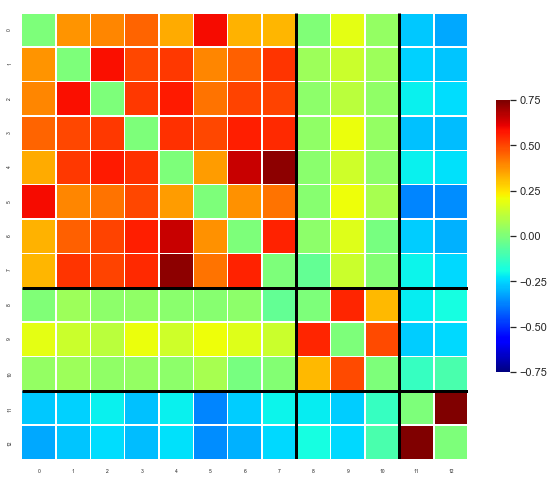

In [16]:
# State 1 (please note that the order of states is according to the k-means output. In this window length analysis, State 1 is most similar to State 3 in the main analysis)
jet = cm.get_cmap('jet') 
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pd.DataFrame(return_dfnc_from_vector(dfnc_1_med.dropna().median())), cmap=jet, vmax=0.75,vmin=-0.75, center=0,
            square=True,linewidths=.5, cbar_kws={"shrink": .5})
ax.tick_params(labelsize=5)
ax.hlines([8, 11], *ax.get_xlim(), colors='black', linewidth=3)
ax.vlines([8, 11], *ax.get_xlim(), colors='black', linewidth=3)
plt.show()

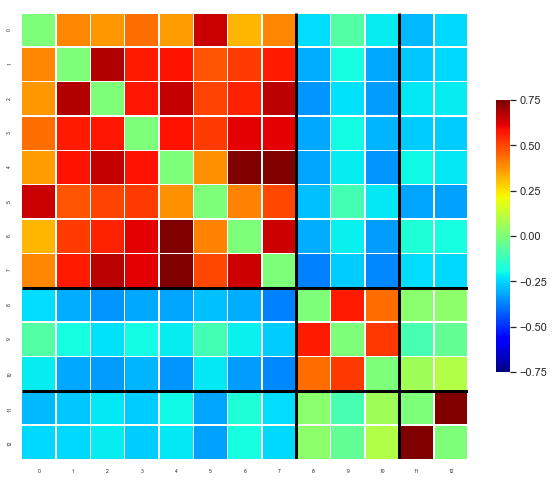

In [17]:
# State 2 (please note that the order of states is according to the k-means output. In this window length analysis, State 2 is most similar to State 1 in the main analysis)
jet = cm.get_cmap('jet') 
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pd.DataFrame(return_dfnc_from_vector(dfnc_2_med.dropna().median())), cmap=jet, vmax=0.75,vmin=-0.75, center=0,
            square=True,linewidths=.5, cbar_kws={"shrink": .5})
ax.tick_params(labelsize=5)
ax.hlines([8, 11], *ax.get_xlim(), colors='black', linewidth=3)
ax.vlines([8, 11], *ax.get_xlim(), colors='black', linewidth=3)
plt.show()

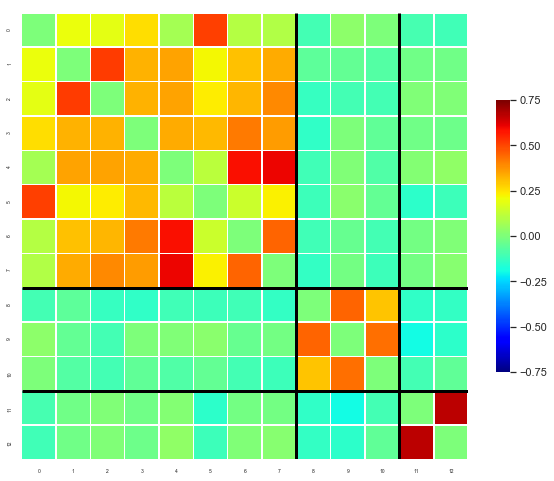

In [19]:
# State 3 (please note that the order of states is according to the k-means output. In this window length analysis, State 3 is most similar to State 2 in the main analysis)
jet = cm.get_cmap('jet') 
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pd.DataFrame(return_dfnc_from_vector(dfnc_3_med.dropna().median())), cmap=jet, vmax=0.75,vmin=-0.75, center=0,
            square=True,linewidths=.5, cbar_kws={"shrink": .5})
ax.tick_params(labelsize=5)
ax.hlines([8, 11], *ax.get_xlim(), colors='black', linewidth=3)
ax.vlines([8, 11], *ax.get_xlim(), colors='black', linewidth=3)
plt.show()

In [20]:
# load individual fraction times
fraction = loadmat('fraction_time.mat')["frac"]
fraction = pd.DataFrame(fraction)
fraction.columns = ["State_1", "State_2", "State_3"]

Subgroup analysis 

/Users/anna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

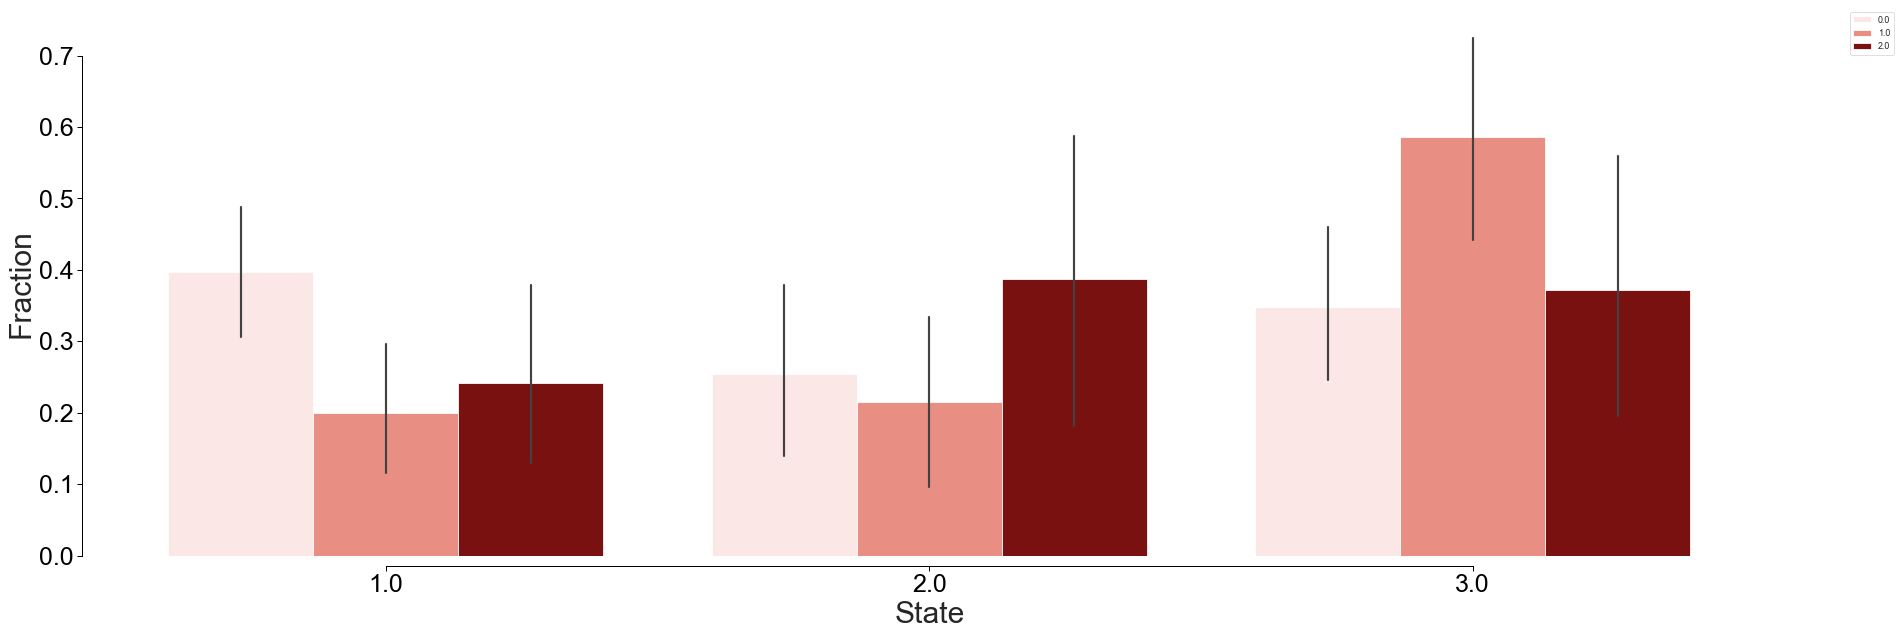

In [21]:
# Once again: State 1 here represents State 3 of the main analysis, State 2 represents State 1 and State 3 State 2 of the main analysis 
fraction_fig = pd.concat([fraction["State_1"], fraction["State_2"], fraction["State_3"]], axis=0)
fraction_fig = pd.DataFrame(fraction_fig)
fraction_fig.index = range(0,n_subjects*3)
fraction_fig = fraction_fig.rename(index=str, columns={0: "Fraction"})
fraction_fig["State"] = np.concatenate([np.ones(n_subjects), np.full(n_subjects,2),np.full(n_subjects,3)])
fraction_fig["Patient_status"] = np.concatenate([np.zeros(n_controls),subgroups,np.zeros(n_controls), subgroups, np.zeros(n_controls),subgroups])

plt.figure(figsize=(30, 10))
#sns.set(style="ticks", palette="pastel")   
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})

sns.set_context("paper", rc={"font.size":30,"axes.titlesize":30,"axes.labelsize":30}) 

# Draw a nested boxplot to show bills by day and time
sns.barplot(x="State", y="Fraction",
            hue="Patient_status",palette=["mistyrose", "salmon", "darkred"],
            #hue="Patient_status",kind="bar",  palette=["silver", "salmon", "darkred"],
            data=fraction_fig)



sns.despine(offset=10, trim=True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot()

In [22]:
# Three-level one-way ANOVA for fraction times: State 1 and 3 show significant ANOVA-effects (i.e. State 3 and 2 of the main analysis)
a = stats.f_oneway(fraction["State_1"].loc[0:n_controls_1], fraction["State_1"].iloc[better],fraction["State_1"].iloc[worse],)[1]
b = stats.f_oneway(fraction["State_2"].loc[0:n_controls_1], fraction["State_2"].iloc[better],fraction["State_2"].iloc[worse],)[1]
c = stats.f_oneway(fraction["State_3"].loc[0:n_controls_1], fraction["State_3"].iloc[better],fraction["State_3"].iloc[worse],)[1]
print("State 1: %f" %stats.f_oneway(fraction["State_1"].loc[0:n_controls_1], fraction["State_1"].iloc[better],fraction["State_1"].iloc[worse],)[1])
print("State 2: %f" %stats.f_oneway(fraction["State_2"].loc[0:n_controls_1], fraction["State_2"].iloc[better],fraction["State_2"].iloc[worse],)[1])
print("State 3: %f" %stats.f_oneway(fraction["State_3"].loc[0:n_controls_1], fraction["State_3"].iloc[better],fraction["State_3"].iloc[worse],)[1])

State 1: 0.023550
State 2: 0.282473
State 3: 0.049616


In [13]:
# post-hoc t-test Control vs moderate: Moderately affected patients stay significantly longer in State 3 (the weakly connected State in the main analysis) and shorter in State 1 (State 3 in the main analysis, not significant for a window length of 44 sec)
n_dfnc = ["State_1", "State_2", "State_3"]
no = [0,1,2,]
p_all_better = np.zeros(3)
print("Fraction time: Controls vs Patients with fewer symptoms")
for n, p in zip(n_dfnc, no):
    rvs1 = fraction[n].loc[0:n_controls_1]
    rvs2 = fraction[n].iloc[better]
    p_all_better[p] = stats.ttest_ind(rvs1,rvs2)[1] 
    print("%s" % n)
    print("Deficit: %f" %(rvs2.mean()))
    print("No Deficit: %f" %(rvs1.mean()))
    print("%f" %stats.ttest_ind(rvs1,rvs2)[1])

Fraction time: Controls vs Patients with fewer symptoms
State_1
Deficit: 0.198990
No Deficit: 0.396791
0.006750
State_2
Deficit: 0.214478
No Deficit: 0.254545
0.665947
State_3
Deficit: 0.586532
No Deficit: 0.348663
0.015969


In [14]:
# post-hoc t-test Control vs severe: No significances 
p_all_worse = np.zeros(3)
print("Fraction time: Controls vs Patients with more symptoms")
for n, p in zip(n_dfnc, no):
    rvs1 = fraction[n].loc[0:n_controls_1]
    rvs2 = fraction[n].iloc[worse]
    p_all_worse[p] = stats.ttest_ind(rvs1,rvs2)[1] 
    print("%s" % n)
    print("Deficit: %f" %(rvs2.mean()))
    print("No Deficit: %f" %(rvs1.mean()))
    print("%f" %stats.ttest_ind(rvs1,rvs2)[1])

Fraction time: Controls vs Patients with more symptoms
State_1
Deficit: 0.241026
No Deficit: 0.396791
0.061975
State_2
Deficit: 0.387413
No Deficit: 0.254545
0.263058
State_3
Deficit: 0.371562
No Deficit: 0.348663
0.834488


In [15]:
# post-hoc t-test Moderate vs severe: No significances
p_all_bw = np.zeros(3)
print("Fraction time: Patients with moderate vs Patients with severe symptoms")
for n, p in zip(n_dfnc, no):
    rvs1 = fraction[n].iloc[better]
    rvs2 = fraction[n].iloc[worse]
    p_all_bw[p] = stats.ttest_ind(rvs1,rvs2)[1] 
    print("%s" % n)
    print("Severe Deficit: %f" %(rvs2.mean()))
    print("Moderate Deficit: %f" %(rvs1.mean()))
    print("%f" %stats.ttest_ind(rvs1,rvs2)[1])

Fraction time: Patients with moderate vs Patients with severe symptoms
State_1
Severe Deficit: 0.241026
Moderate Deficit: 0.198990
0.603679
State_2
Severe Deficit: 0.387413
Moderate Deficit: 0.214478
0.149091
State_3
Severe Deficit: 0.371562
Moderate Deficit: 0.586532
0.089582


In [16]:
# load dwell times
dwell = loadmat('dwell_time.mat')["dwell"]
dwell = pd.DataFrame(dwell)
dwell.columns = ["State_1", "State_2", "State_3"]

In [17]:
# Dwell times in general do not differ between the groups
rvs1 = np.array(dwell.loc[0:n_controls_1]).ravel()
rvs2 = np.array(dwell.iloc[better]).ravel()
rvs3 = np.array(dwell.iloc[worse]).ravel()
print("Mean dwell time")
print("No deficit: %f" %(rvs1.mean()))
print("Moderate Deficit: %f" %(rvs2.mean()))
print("Severe Deficit: %f" %(rvs3.mean()))
print("Mean dwell time diff: %f" %stats.f_oneway(rvs1, rvs2,rvs3,)[1])

Mean dwell time
No deficit: 13.608824
Moderate Deficit: 17.491292
Severe Deficit: 17.758120
Mean dwell time diff: 0.456945


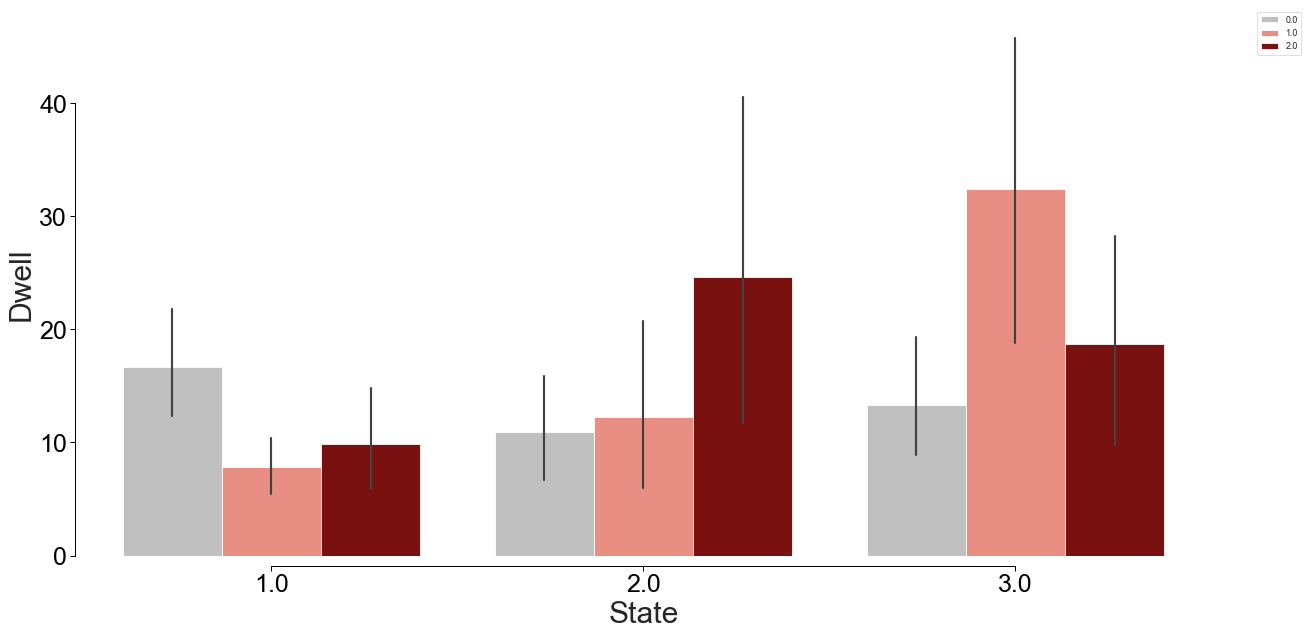

In [18]:
# Once again: State 1 here represents State 3 of the main analysis, State 2 represents State 1 and State 3 State 2 of the main analysis 

fraction_fig = pd.concat([dwell["State_1"], dwell["State_2"], dwell["State_3"]], axis=0)
fraction_fig = pd.DataFrame(fraction_fig)
fraction_fig.index = range(0,n_subjects*3)
fraction_fig = fraction_fig.rename(index=str, columns={0: "Dwell"})
fraction_fig["State"] = np.concatenate([np.ones(n_subjects), np.full(n_subjects,2),np.full(n_subjects,3)])
fraction_fig["Patient_status"] = np.concatenate([np.zeros(n_controls),subgroups,np.zeros(n_controls), subgroups, np.zeros(n_controls),subgroups])

plt.figure(figsize=(20, 10))
#sns.set(style="ticks", palette="pastel")   
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})

sns.set_context("paper", rc={"font.size":30,"axes.titlesize":30,"axes.labelsize":30}) 

# Draw a nested boxplot to show bills by day and time
sns.barplot(x="State", y="Dwell",
            #hue="Patient_status",palette=["mistyrose", "salmon", "darkred"],
            hue="Patient_status",palette=["silver", "salmon", "darkred"],
            data=fraction_fig)
sns.despine(offset=10, trim=True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [19]:
# Three-level one-way ANOVA for fraction times: Significant differences for State 1 (State 3 in the main analysis) and State 3 (State 2 in the main analysis)
d = stats.f_oneway(dwell["State_1"].loc[0:n_controls_1], dwell["State_1"].iloc[better],dwell["State_1"].iloc[worse],)[1]
e = stats.f_oneway(dwell["State_2"].loc[0:n_controls_1], dwell["State_2"].iloc[better],dwell["State_2"].iloc[worse],)[1]
f = stats.f_oneway(dwell["State_3"].loc[0:n_controls_1], dwell["State_3"].iloc[better],dwell["State_3"].iloc[worse],)[1]
print("State 1: %f" %stats.f_oneway(dwell["State_1"].loc[0:n_controls_1], dwell["State_1"].iloc[better],dwell["State_1"].iloc[worse],)[1])
print("State 2: %f" %stats.f_oneway(dwell["State_2"].loc[0:n_controls_1], dwell["State_2"].iloc[better],dwell["State_2"].iloc[worse],)[1])
print("State 3: %f" %stats.f_oneway(dwell["State_3"].loc[0:n_controls_1], dwell["State_3"].iloc[better],dwell["State_3"].iloc[worse],)[1])

State 1: 0.008525
State 2: 0.113220
State 3: 0.031142


In [20]:
# post-hoc t-test Control vs moderate: Moderately affected patients stay significantly longer in State 2 of the main analysis and short in State 3 of the main analysis at any one time 
p_all_better = np.zeros(3)
print("Dwell time: Controls vs Patients with fewer symptoms")
for n, p in zip(n_dfnc, no):
    rvs1 = dwell[n].loc[0:n_controls_1]
    rvs2 = dwell[n].iloc[better]
    p_all_better[p] = stats.ttest_ind(rvs1,rvs2)[1] 
    print("%s" % n)
    print("Deficit: %f" %(rvs2.mean()))
    print("No Deficit: %f" %(rvs1.mean()))
    print("%f" %stats.ttest_ind(rvs1,rvs2)[1])

Dwell time: Controls vs Patients with fewer symptoms
State_1
Deficit: 7.806746
No Deficit: 16.640196
0.003004
State_2
Deficit: 12.268981
No Deficit: 10.909804
0.778556
State_3
Deficit: 32.398148
No Deficit: 13.276471
0.015831


In [21]:
# post-hoc t-test Control vs severe: Severely affected patients show a trend for longer dwell times in State 3 of the main analysis (State 2 here)
p_all_worse = np.zeros(3)
print("Dwell time: Controls vs Patients with more symptoms")
for n, p in zip(n_dfnc, no):
    rvs1 = dwell[n].loc[0:n_controls_1]
    rvs2 = dwell[n].iloc[worse]
    p_all_worse[p] = stats.ttest_ind(rvs1,rvs2)[1] 
    print("%s" % n)
    print("Deficit: %f" %(rvs2.mean()))
    print("No Deficit: %f" %(rvs1.mean()))
    print("%f" %stats.ttest_ind(rvs1,rvs2)[1])

Dwell time: Controls vs Patients with more symptoms
State_1
Deficit: 9.898168
No Deficit: 16.640196
0.063785
State_2
Deficit: 24.624359
No Deficit: 10.909804
0.068380
State_3
Deficit: 18.751832
No Deficit: 13.276471
0.311070


In [22]:
# post-hoc t-test moderate vs severe: No significant differences
p_all_bw = np.zeros(3)
print("Dwell time: Controls vs Patients with more symptoms")
for n, p in zip(n_dfnc, no):
    rvs1 = dwell[n].iloc[better]
    rvs2 = dwell[n].iloc[worse]
    p_all_bw[p] = stats.ttest_ind(rvs1,rvs2)[1] 
    print("%s" % n)
    print("Deficit: %f" %(rvs2.mean()))
    print("No Deficit: %f" %(rvs1.mean()))
    print("%f" %stats.ttest_ind(rvs1,rvs2)[1])

Dwell time: Controls vs Patients with more symptoms
State_1
Deficit: 9.898168
No Deficit: 7.806746
0.425124
State_2
Deficit: 24.624359
No Deficit: 12.268981
0.139573
State_3
Deficit: 18.751832
No Deficit: 32.398148
0.147422


In [23]:
# No significant group effects for the number of transitions
num_trans = loadmat('num_trans.mat')["num_trans"]
num_trans = pd.DataFrame(num_trans)
rvs1 = num_trans.loc[0:n_controls_1]
rvs2 = num_trans.iloc[better]
rvs3 = num_trans.iloc[worse]
print("Mean No of transitions")
print("No deficit: %f" %(rvs1.mean()))
print("Moderate Deficit: %f" %(rvs2.mean()))
print("Severe Deficit: %f" %(rvs3.mean()))
print("Mean dwell time diff: %f" %stats.f_oneway(rvs1, rvs2,rvs3,)[1])

Mean No of transitions
No deficit: 10.000000
Moderate Deficit: 8.388889
Severe Deficit: 7.769231
Mean dwell time diff: 0.360344


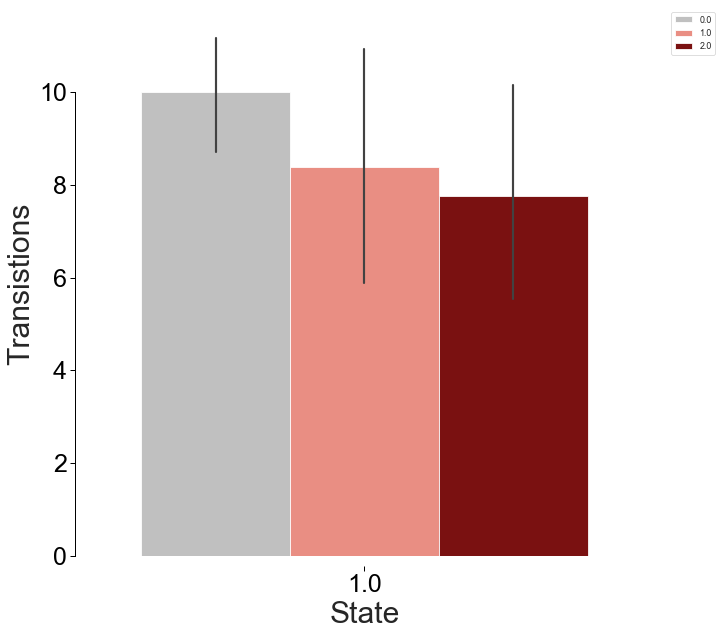

In [24]:
fraction_fig = pd.DataFrame(num_trans)
fraction_fig = fraction_fig.rename(index=str, columns={0: "Transistions"})
fraction_fig["State"] = np.concatenate([np.ones(n_subjects),])
fraction_fig["Patient_status"] = np.concatenate([np.zeros(n_controls),subgroups,])

plt.figure(figsize=(10, 10))
#sns.set(style="ticks", palette="pastel")   
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})

sns.set_context("paper", rc={"font.size":30,"axes.titlesize":30,"axes.labelsize":30}) 

# Draw a nested boxplot to show bills by day and time
sns.barplot(x="State", y="Transistions",
            #hue="Patient_status",palette=["mistyrose", "salmon", "darkred"],
            hue="Patient_status",palette=["silver", "salmon", "darkred"],
            data=fraction_fig)
sns.despine(offset=10, trim=True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [25]:
# load transition likelihood
transition = loadmat('transition.mat')["transition"]

In [26]:
# Three-level one-way ANOVA transition likelihoods (from state, to state)
trans_p = []
for no_1 in range(0,3,1):
    for no_2 in range(0,3,1):
        trans_c = []
        trans_pb = []
        trans_pw = []
        for n in range(0,n_controls,1):
                trans_c.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        for n in better:
                trans_pb.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        for n in worse:
                trans_pw.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        print(no_1)
        print(no_2)
        trans_p.append(stats.f_oneway(np.array(trans_c), np.array(trans_pb),np.array(trans_pw))[1])
        print("Transition: %f" %stats.f_oneway(np.array(trans_c), np.array(trans_pb),np.array(trans_pw))[1])
              
              

0
0
Transition: 0.256727
0
1
Transition: 0.301014
0
2
Transition: 0.078075
1
0
Transition: 0.548944
1
1
Transition: 0.556503
1
2
Transition: 0.645114
2
0
Transition: 0.176249
2
1
Transition: 0.949630
2
2
Transition: 0.847700


In [27]:
# post-hoc t-test controls vs moderate
for no_1 in range(0,3,1):
    for no_2 in range(0,3,1):
        trans_c_11 = []
        trans_p_11 = []
        print(no_1)
        print(no_2)
        for n in range(0,n_controls,1):
                trans_c_11.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        print("Mean controls: %f" %np.array(trans_c_11).mean())
        for n in better:
                trans_p_11.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        print("Mean better: %f" %np.array(trans_p_11).mean())
        print("Stats %f" %stats.ttest_ind(np.array(trans_c_11),np.array(trans_p_11))[1]) 

0
0
Mean controls: 0.921998
Mean better: 0.892970
Stats 0.192746
0
1
Mean controls: 0.039118
Mean better: 0.023273
Stats 0.319335
0
2
Mean controls: 0.038884
Mean better: 0.083757
Stats 0.008953
1
0
Mean controls: 0.021458
Mean better: 0.019363
Stats 0.818392
1
1
Mean controls: 0.881311
Mean better: 0.932416
Stats 0.123494
1
2
Mean controls: 0.097230
Mean better: 0.048221
Stats 0.147428
2
0
Mean controls: 0.057968
Mean better: 0.030806
Stats 0.047507
2
1
Mean controls: 0.036899
Mean better: 0.045934
Stats 0.769689
2
2
Mean controls: 0.905134
Mean better: 0.923260
Stats 0.600342


In [28]:
# post-hoc t-test controls vs severe
for no_1 in range(0,3,1):
    for no_2 in range(0,3,1):
        trans_c_11 = []
        trans_p_11 = []
        print(no_1)
        print(no_2)
        for n in range(0,n_controls,1):
                trans_c_11.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        print("Mean controls: %f" %np.array(trans_c_11).mean())
        for n in worse:
                trans_p_11.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        print("Mean worse: %f" %np.array(trans_p_11).mean())
        print("%f" %stats.ttest_ind(np.array(trans_c_11),np.array(trans_p_11))[1]) 

0
0
Mean controls: 0.921998
Mean worse: 0.831354
0.182066
0
1
Mean controls: 0.039118
Mean worse: 0.103701
0.344541
0
2
Mean controls: 0.038884
Mean worse: 0.064945
0.206853
1
0
Mean controls: 0.021458
Mean worse: 0.031701
0.422090
1
1
Mean controls: 0.881311
Mean worse: 0.878687
0.971623
1
2
Mean controls: 0.097230
Mean worse: 0.089612
0.920231
2
0
Mean controls: 0.057968
Mean worse: 0.041536
0.359341
2
1
Mean controls: 0.036899
Mean worse: 0.043426
0.761401
2
2
Mean controls: 0.905134
Mean worse: 0.915038
0.735831


In [29]:
# post-hoc t-test moderate vs severe
for no_1 in range(0,3,1):
    for no_2 in range(0,3,1):
        trans_c_11 = []
        trans_p_11 = []
        print(no_1)
        print(no_2)
        for n in better:
                trans_c_11.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        print("Mean better: %f" %np.array(trans_c_11).mean())
        for n in worse:
                trans_p_11.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        print("Mean worse: %f" %np.array(trans_p_11).mean())
        print("%f" %stats.ttest_ind(np.array(trans_c_11),np.array(trans_p_11))[1]) 

0
0
Mean better: 0.892970
Mean worse: 0.831354
0.354484
0
1
Mean better: 0.023273
Mean worse: 0.103701
0.221818
0
2
Mean better: 0.083757
Mean worse: 0.064945
0.455858
1
0
Mean better: 0.019363
Mean worse: 0.031701
0.347395
1
1
Mean better: 0.932416
Mean worse: 0.878687
0.415690
1
2
Mean better: 0.048221
Mean worse: 0.089612
0.533799
2
0
Mean better: 0.030806
Mean worse: 0.041536
0.474132
2
1
Mean better: 0.045934
Mean worse: 0.043426
0.945162
2
2
Mean better: 0.923260
Mean worse: 0.915038
0.815656
